In [5]:
%cd ~/REVIVAL2
%load_ext autoreload
%autoreload 2
# %load_ext blackcellmagic

/disk2/fli/REVIVAL2
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

In [12]:
df_4b = pd.read_csv("/disk2/fli/REVIVAL2/zs/vina/score/freeze_cofactor/PfTrpB-4bromo.csv")
df_4b[df_4b["vina"].isna()]

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,cofactor,cofactor-smiles,intermediate-smiles,vina_0,vina_1,vina_2,vina_3,vina_4,vina,vina_rank
193,TIP,-0.012398,I165T:Y301P,2,T,I,P,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
spearmanr(df_4b["fitness"], df_4b["vina"]), spearmanr(df_4b["fitness"], df_4b["vina_min"]), spearmanr(df_4b["fitness"], df_4b["vina_max"]), spearmanr(df_4b["fitness"], df_4b["vina_0"])

(SignificanceResult(statistic=nan, pvalue=nan),
 SignificanceResult(statistic=nan, pvalue=nan),
 SignificanceResult(statistic=nan, pvalue=nan),
 SignificanceResult(statistic=nan, pvalue=nan))

In [16]:
import matplotlib.pyplot as plt

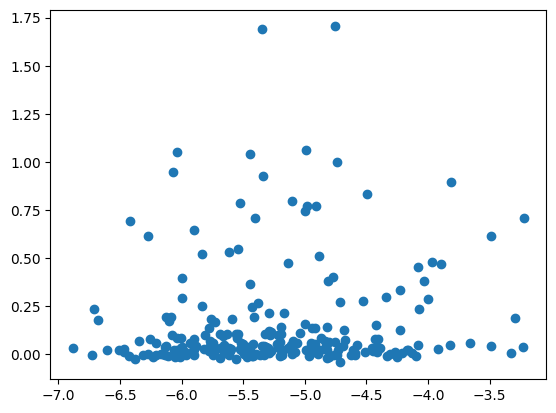

In [17]:
plt.scatter(df_4b["vina"], df_4b["fitness"])

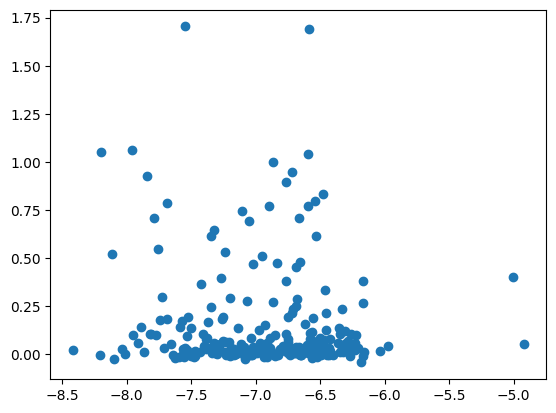

In [18]:
plt.scatter(df_4b["vina_min"], df_4b["fitness"])

In [20]:
import pandas as pd
from glob import glob
from scipy.stats import spearmanr

from REVIVAL.util import get_file_name


# Initialize an empty list to store results
results = []

# Loop through the CSV files and calculate Spearman correlation
for lib in sorted(glob("/disk2/fli/REVIVAL2/zs/vina/score/freeze_cofactor/*.csv")):
    lib_name = get_file_name(lib)
    lib_df = pd.read_csv(lib)
    
    df_nan = lib_df[lib_df.isna().any(axis=1)]
    if len(df_nan) > 0:
        print(f"NaN values found in {lib_name}")
        print(df_nan)
    # for each row take min of vina_0, vina_1, vina_2, vina_3, and vina_4
    lib_df["vina_min"] = lib_df[["vina_0", "vina_1", "vina_2", "vina_3", "vina_4"]].min(axis=1)
    lib_df["vina_max"] = lib_df[["vina_0", "vina_1", "vina_2", "vina_3", "vina_4"]].max(axis=1)

    agg_c = ["vina", "vina_min", "vina_max"]
    # std_c = [c for c in chai_df.columns if "std" in c]

    # Calculate Spearman correlation for each column in avg_c
    for c in agg_c:
        valid_df = lib_df[lib_df[c].notna()].copy()
        correlation, p_value = spearmanr(valid_df["fitness"].values, valid_df[c].values)
        # std_col = merged_df[c.replace("avg", "std")].values
        results.append({
            "Library": lib_name,
            "Score_Type": c,
            # "variability": std_col.mean(),
            "Spearman_Correlation": correlation,
            "P_Value": p_value
        })

# Convert results into a DataFrame and display it as a table
results_df = pd.DataFrame(results)
display(results_df)

NaN values found in PfTrpB-4bromo
     AAs   fitness                var  n_mut AA1 AA2 AA3  \
14   CFY  1.050489        I165C:I183F      2   C   F   Y   
15   CHA  0.010810  I165C:I183H:Y301A      3   C   H   A   
16   CLH  0.285379  I165C:I183L:Y301H      3   C   L   H   
193  TIP -0.012398        I165T:Y301P      2   T   I   P   
199  TWW  0.236846  I165T:I183W:Y301W      3   T   W   W   
200  TYI  0.054925  I165T:I183Y:Y301I      3   T   Y   I   
201  VAL  0.401403  I165V:I183A:Y301L      3   V   A   L   

                                                   seq  enzyme substrate  ...  \
14   MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...  PfTrpB    4bromo  ...   
15   MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...  PfTrpB    4bromo  ...   
16   MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...  PfTrpB    4bromo  ...   
193  MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...  PfTrpB    4bromo  ...   
199  MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...  PfTrpB    4bromo  ...   

,Library,Score_Type,Spearman_Correlation,P_Value
0,PfTrpB-4bromo,vina,0.131740,0.041435
1,PfTrpB-4bromo,vina_min,-0.039336,0.544218
2,PfTrpB-4bromo,vina_max,0.192338,0.002770
3,PfTrpB-4cyano,vina,0.018243,0.778127
4,PfTrpB-4cyano,vina_min,-0.019274,0.765942
5,PfTrpB-4cyano,vina_max,0.043565,0.500878
6,PfTrpB-56chloro,vina,0.076184,0.238696
7,PfTrpB-56chloro,vina_min,-0.029981,0.643281
8,PfTrpB-56chloro,vina_max,0.080665,0.212112
9,PfTrpB-5bromo,vina,0.027445,0.671619
